In [1]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

In [2]:
# Read the JSON into a data frame, convert the time column into datetime
# and add a flag that distinguishes between searches and other activity.

search1 = pd.read_json('search-history-1.json')
search2 = pd.read_json('search-history-2.json')
search3 = pd.read_json('search-history-3.json')

print(search1.shape, search2.shape, search3.shape)
print(len(search1)+len(search2)+len(search3))

(91, 6) (154, 6) (1135, 6)
1380


In [3]:
searches = pd.concat([search1, search2, search3])
print(searches.shape)
searches.head()

(1380, 6)


,header,title,titleUrl,time,products,activityControls
0,YouTube,Searched for add two numbers leetcode,https://www.youtube.com/results?search_query=a...,2023-07-15T01:28:45.987Z,[YouTube],[YouTube search history]
1,YouTube,Searched for copy list with random pointer,https://www.youtube.com/results?search_query=c...,2023-07-14T22:58:50.511Z,[YouTube],[YouTube search history]
2,YouTube,Searched for remove nth node from end of list,https://www.youtube.com/results?search_query=r...,2023-07-14T21:37:21.001Z,[YouTube],[YouTube search history]
3,YouTube,Searched for quant vs investment banking,https://www.youtube.com/results?search_query=q...,2023-07-14T01:01:48.962Z,[YouTube],[YouTube search history]
4,YouTube,Searched for what is investment banking,https://www.youtube.com/results?search_query=w...,2023-07-14T00:37:13.180Z,[YouTube],[YouTube search history]


In [4]:
# Get date time and searches if they start with "Searched for "

searches['time'] = pd.to_datetime(searches['time'])
searches['searches'] = searches['title'].apply(lambda x:
        'Yes' if x[:13]=="Searched for " else "No")
searches['title'] = searches['title'].apply(lambda x: x.lower())


In [5]:
first = searches["time"].min()
last = searches["time"].max()
print("\n", first, "\n", last)
print("\n", (last.year-first.year), "years or", last - first)


 2012-07-17 23:49:45.761000+00:00 
 2023-07-15 01:28:45.987000+00:00

 11 years or 4014 days 01:39:00.226000


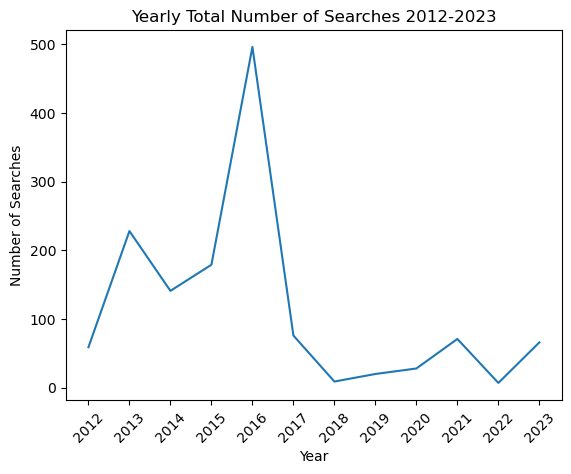

In [6]:
df3 = searches.groupby(searches["time"].dt.year)["searches"].count()
x = df3.index
y = np.array(df3)
plt.plot(x,y)
plt.title("Yearly Total Number of Searches 2012-2023")
plt.xlabel("Year")
plt.ylabel("Number of Searches")
plt.yticks(np.arange(0,600,100))
plt.xticks(np.arange(2012,2024))
plt.xticks(rotation=45, ha='center')
plt.show()

Average searches per month: 10.37593984962406


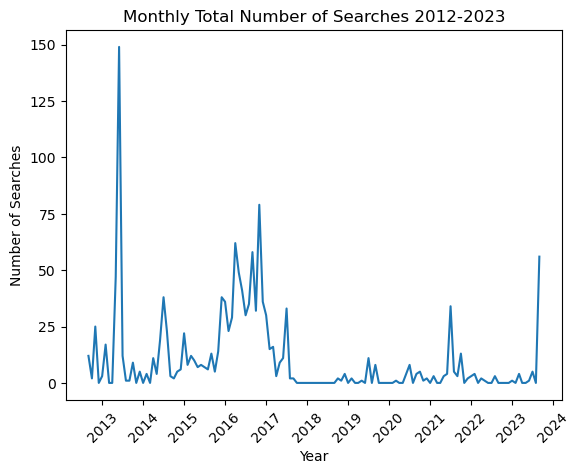

In [7]:
df3 = searches.groupby(pd.Grouper(key='time',freq='1M'))["searches"].count()
#df3 = df3.groupby("Category")["searches"].count()
df3

x = df3.index
y = np.array(df3)
print("Average searches per month:", np.average(y))
import warnings
warnings.filterwarnings('ignore')
    
fig,ax=plt.subplots()
plt.plot(x,y)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticklabels(np.arange(2013,2025))
plt.yticks(np.arange(0,151,25))
plt.xticks(rotation=45)
plt.title("Monthly Total Number of Searches 2012-2023")
plt.xlabel("Year")
plt.ylabel("Number of Searches")
plt.show()

Average searches per day: 0.3436254980079681


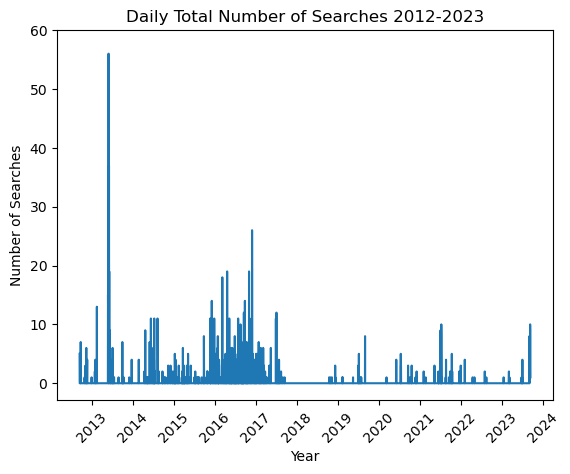

In [8]:
df3 = searches.groupby(pd.Grouper(key='time',freq='1D'))["searches"].count()
#df3 = df3.groupby("Category")["searches"].count()
df3

x = df3.index
y = np.array(df3)
print("Average searches per day:", np.average(y))
import warnings
warnings.filterwarnings('ignore')
    
fig,ax=plt.subplots()
plt.plot(x,y)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticklabels(np.arange(2013,2025))
plt.yticks(np.arange(0,70,10))
plt.xticks(rotation=45)
plt.title("Daily Total Number of Searches 2012-2023")
plt.xlabel("Year")
plt.ylabel("Number of Searches")
plt.show()

In [9]:
df3 = searches.groupby(searches["time"].dt.year)["searches"].count()
x = df3.index
y = np.array(df3)
print("Average searches per Year:", int(np.average(y)))

df3 = searches.groupby(pd.Grouper(key='time',freq='1M'))["searches"].count()
x = df3.index
y = np.array(df3)
print("Average searches per Month:", round(np.average(y),1))

df3 = searches.groupby(pd.Grouper(key='time',freq='1W'))["searches"].count()
x = df3.index
y = np.array(df3)
print("Average searches per Week:", round(np.average(y),1))

df3 = searches.groupby(pd.Grouper(key='time',freq='1D'))["searches"].count()
x = df3.index
y = np.array(df3)
print("Average searches per Day:", round(np.average(y),2))

df3 = searches[searches['time'].dt.year == 2016]
df3 = df3.groupby(pd.Grouper(key='time',freq='1W'))["searches"].count()
x = df3.index
y = np.array(df3)
print("\nAverage searches per Week in all 2016:", round(np.average(y),1))

df3 = searches[searches['time'].dt.year == 2023]
df3 = df3[df3['time'].dt.month == 7]
df3 = df3.groupby(pd.Grouper(key='time',freq='1D'))["searches"].count()
x = df3.index
y = np.array(df3)
print("\nAverage searches per Day in July 2023:", round(np.average(y),1))

Average searches per Year: 115
Average searches per Month: 10.4
Average searches per Week: 2.4
Average searches per Day: 0.34

Average searches per Week in all 2016: 9.5

Average searches per Day in July 2023: 4.3


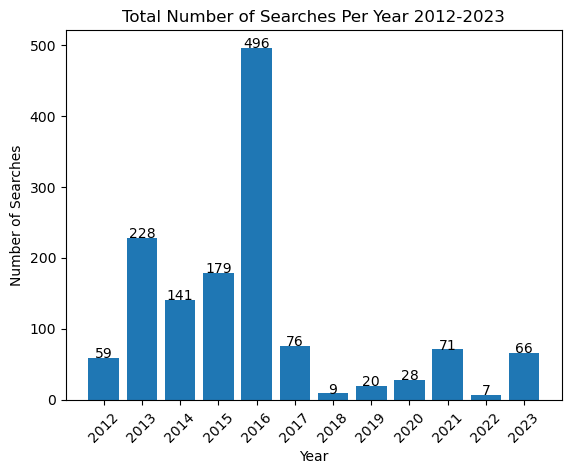

In [10]:
# Total Number of Searches Per Year
df3 = searches.groupby(searches["time"].dt.year)["searches"].count()
x = df3.index
y = np.array(df3)

plt.bar(x,y)
plt.title("Total Number of Searches Per Year 2012-2023")
plt.xlabel("Year")
plt.ylabel("Number of Searches")
plt.yticks(np.arange(0,600,100))
plt.xticks(np.arange(2012,2024))
plt.xticks(rotation=45, ha='center')

for i in range(len(x)):
    plt.text(x[i], y[i], y[i], ha='center')
    
plt.show()

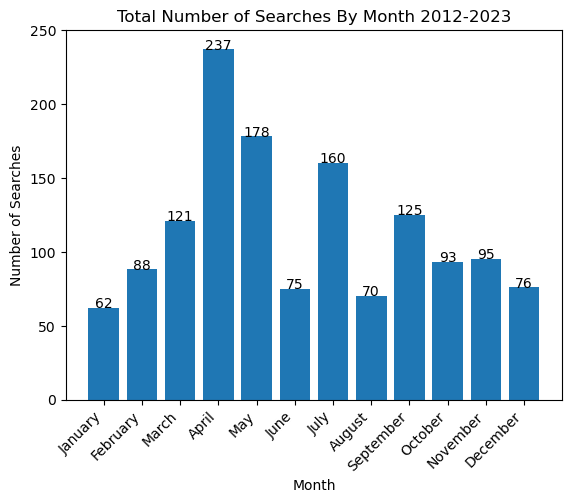

In [11]:
# Total Number of Searches Per Month
df3 = searches.groupby(searches["time"].dt.month)["searches"].count()
x = df3.index
y = np.array(df3)

months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]
        
plt.bar(x,y)
plt.title("Total Number of Searches By Month 2012-2023")
plt.xlabel("Month")
plt.ylabel("Number of Searches")
plt.yticks(np.arange(0,300,50))
plt.xticks(np.arange(1,13), labels=months, rotation=45, ha='right')

for i in range(len(x)):
    plt.text(i+1, y[i], y[i], ha='center')
    
plt.show()

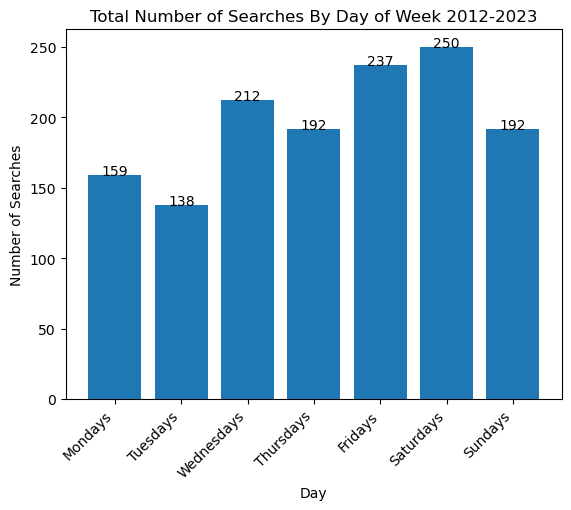

In [12]:
# Total Number of Searches Per Day
df3 = searches.groupby(searches["time"].dt.weekday)["searches"].count()
x = df3.index
y = np.array(df3)

days = ["Mondays", "Tuesdays", "Wednesdays", "Thursdays", "Fridays", "Saturdays", "Sundays"]
        
plt.bar(x,y)
plt.title("Total Number of Searches By Day of Week 2012-2023")
plt.xlabel("Day")
plt.ylabel("Number of Searches")
plt.yticks(np.arange(0,300,50))
plt.xticks(np.arange(0,7), labels=days, rotation=45, ha='right')

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center')
    
plt.show()

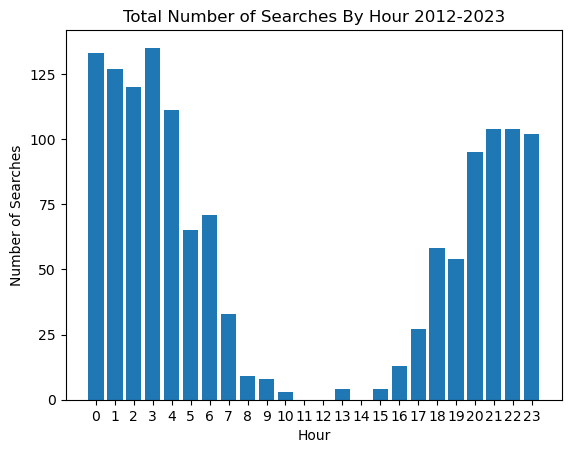

In [13]:
# Total Number of Searches Per Month
df3 = searches.groupby(searches["time"].dt.hour)["searches"].count()
x = df3.index
y = np.array(df3)
    
plt.bar(x,y)
plt.title("Total Number of Searches By Hour 2012-2023")
plt.xlabel("Hour")
plt.ylabel("Number of Searches")
plt.yticks(np.arange(0,150,25))
plt.xticks(np.arange(0,24), ha='center')

plt.show()

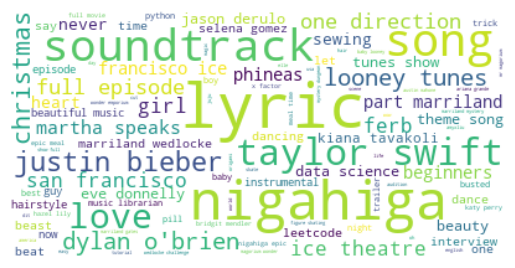

In [14]:
# Create a temporary copy of the activity DF.
# Strip off the first 13 chars ("Searched for ") from the title to leave just the query,
# then put the queries in a list.

_ = searches[(searches['searches']=='Yes')].copy()
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

In [137]:
# Defining Categories



#apartments = ["south campus", "apartments", "boston university", "mattress",
#              "housing", "dorm", "sleeper hall", "bu housing"]

haircut = ["haircut", "pigtail", "unicorn", "framing", "layers", "hair", "cut",
           "brad mondo", "bangs", "curtain bangs", "hairstyles", "hairstyle", "makeup",
           "eyeshadow", "contour", "mask", "lip", "bun"]

sewing = ["sewing", "halter", "darts", "jeans", "waste", "take in", "hem",
          "zipper", "stitch", "stitches", "thrift flip", "skirt", "pockets",
          "sew", "iron", "fabric", "shirr", "sewing machine", "ruche", "ruche",
          "ruched", "crop", "cinch", "foot pedal", "shoulder purse", "pin cushion",
          "crafts", "origami", "mother's day", "mothers day", "string", "cast on", "cast off",
          "bunny tail", "knitting", "juggle", "magic", "trick", "tricks"]

music = ["jazz", "music", "beautiful music", "lyrics" "soundtrack", "instrumental",
         "x factor", "emporium", "karmin", "anaconda", "hey soul sister", "papaoutai",
         "overture", "chasing cars", "marseillaise", "frank sinatra", "pompeii",
         "edith piaf", "bad blood" "kill em with kindness", "waltz", "ukelele",
         "champs elysees", "one direction", "taylor swift", "jason derulo", 
         "justin bieber", "selena gomez", "maroon", "katy perry", "austin mahone",
         "ariana grande", "britney spears", "iggy azalea", "ellie golding", 
         "carly rae", "melanie martinez", "jon bellion", "kanye", "miley cyrus", 
         "meghan trainor", "nicki minaj", "ross lynch", "bruno mars", "celine dion", 
         "niall horan", "soulja", "fifth harmony", "rihanna", "khaled", "nae", "adele", 
         "demi lovato", "lorde", "macklemore", "halsey", "daya", "vamps", "want you back",
         "childish gambino", "christmas", "holly", "antebellum", "sleigh", "jingle", "beat",
         "love", "my house", "dj", "rico & vinz", "song", "pillow talk", "heart", "tyga",
         "you raise me up", "glee", "sweet caroline", "soul sister", "lush life", "lemondrops",
         "when we were young", "cheerleader", "soundtrack", "lyrics", "let it be", "leave her",
         "beautiful", "bts", "winter", "elle me dit", "bridget mendler", "trap", "dancing queen",
         "becky g", "shower", "1975", "ne yo", "lindsey sterling", "rien de rien", "fox", "drake",
         "rockstar", "chants", "louise", "sweatshirt", "let it go", "ididna", "beyonce", "boyfriend",
         "baby", "lost boy", "wrecking ball", "stand by you", "know my name", "remix", "scream and shout"
         "les", "belong", "pretty pretty please", "downtown", "ocean", "fetty", "young", "quan", "pink",
         "home", "mama", "gonna", "close your eyes", "come back", "end of the day", "jessica simpson",
         "nick jonas", "infinity", "wonderful", "snow", "midnight", "puth", "bright", "echosmith", "reflection",
         "vie", "no type", "bang bang", "amnesia", "aoki", "dougie", "steal my girl", "stop don't", "anaconda",
         "boom clap", "charli xcx", "tinashe", "chris brown", "build a snowman", "fancy", "justin",
         "ready or not", "party in the usa", "imagine dragons", "watcha say", "cher", "came to say hello",
         "fire and rain", "ellie goulding", "bridgit mendler", "rebecca black", "glad you came", "megan", "lights"
         "watcha say", "justin", "bieber"]

#health = ["binaural beats", "lucid", "dream", "dreaming", "sleep", "resistance", 
         #"resistance band", "workout", "butt", "yawning", "bruises"]

movies = ["trailer", "cinderella", "scene", "episode", "new girl", "piano", "frozen"
          "90210", "grey's anatomy", "switched at birth", "stiles", "leighton meester",
          "pitch perfect", "wreck it ralph", "movie", "teen beach"]

entertainment = ["dylan o'brien", "dylan obrien", "dylan", "suni lee", "juju", "maia mitchell", "jacob sartorius",
                 "bloopers", "storytime", "aesthetic", "shane dawson", "nigahiga",
                 "epic meal time", "jenna marbles", "worst cooks", "jimmy fallon","parody", 
                 "edits", "olympic", "olympics", "coraline", "cat", "abandoned", "unit 731", "moon",
                 "damn daniel", "miranda singz", "miranda sings", "story", "tana", "bakes", "dance", "talent",
                 "deez", "ellen", "b plus", "fails", "marriland", "birthday"]

childhood = ["phineas and ferb", "phineas", "ferb", "martha speaks", 
             "looney tunes", "theme song", "moshi", "mulan", "pokemon", "aladdin",
             "hannah montana", "jesse", "ratatouille", "lion king", "gaston",
             "harry potter", "zack binspin", "enchanted", "teletubbies", "moana",
             "maleficent", "oz", "kiana tavakoli", "eve donnelly", "hazel shah", 
             "amyxliu", "tyler furrier","sanaz ebrahimi", "leila khan", "SANAZ", 
             "yoon", "onderdonk", "sarah o'riordan", "bo fang" "eve donelly", "jade stone",
             "hershey", "amy liu", "emily asher", "zooesb", "zoe", "zoe baghaie"
             "zoebaghaie", "zoebaghaei", "disney", "ellie fitton", "sanaz", "naomi", "sarah",
             "austin and ally", "beauty and the beast", "tinkerbell", "dumb ways to die"]

dsa = ["leetcode", "pointer", "nth", "node", "add", "list", "code", 
       "basic calculator", "python", "min", "stack", "valid", "parentheses", 
       "sudoku", "temperatures", "sort", "character", "complexity", "heap"]

ds = ["ab testing", "ab test", "joma", "joma tech", "mysql", "joins", "sql", 
      "machine learning", "power", "bi", "desktop", "manage relationships", 
      "azure", "data flow", "csv", "parquet", "convert", "eigenvalues", 
      "eigenvectors", "datasets", "statistics"]

finance = ["quant", "finance", "financial", "investment", "banking", "bank", 
           "investment banking", "financial analyst", "intro"]

interview = ["interview", "interviews", "prep", "tell me about yourself", "tell", 
             "tell me", "coding interview", "coding interviews", "tech interview", 
             "tech interviews", "jeff su", "jeff", "su"]

career = ["vs", "day in the life", "work life balance", "roadmap", "entry level", 
          "analyst", "trader", "researcher", "jobs", "salary", "new grad",
          "companies", "undergraduate", "law", "crash course", "course"]

learning = ["holocaust", "french", "animals hunt", "states and capitals", "wacko",
            "cacahuete", "equation", "war"]

skating = ["ice", "skating", "skate", "skates", "synchronized", "figure", 
           "haydenettes", "hayden", "sfit", "novice", "free skate", "world",
           "theatre", "nationals", "harmony", "isabellafigureskater", "ashley wagner",
           "gracie gold", "polina edmunds", "mariah bell", "evgenia", "championships",
           "alyssa liu", "alysa liu", "redwood city", "redwood", "billy kheir"]

educational = dsa + ds + finance + interview + career + learning
entertainment = entertainment + movies + childhood

In [138]:
def get_categories(x):
    for i in music:
        if i in x:
            return "Music"
    for i in skating:
        if i in x:
            return "Ice Skating"
    for i in entertainment:
        if i in x:
            return "Entertainment"
    for i in educational:
        if i in x:
            return "Educational"
    for i in haircut:
        if i in x:
            return "Beauty"
    for i in sewing:
        if i in x:
            return "Crafts"
    return "Other"
    
    
pd.set_option('display.max_rows', None)
searches["Category"] = searches["title"].apply(get_categories)
searches.head()

,header,title,titleUrl,time,products,activityControls,searches,Category,hour,dayofweek,month,year
0,YouTube,searched for add two numbers leetcode,https://www.youtube.com/results?search_query=a...,2023-07-15 01:28:45.987000+00:00,[YouTube],[YouTube search history],Yes,Educational,1,5,7,2023
1,YouTube,searched for copy list with random pointer,https://www.youtube.com/results?search_query=c...,2023-07-14 22:58:50.511000+00:00,[YouTube],[YouTube search history],Yes,Educational,22,4,7,2023
2,YouTube,searched for remove nth node from end of list,https://www.youtube.com/results?search_query=r...,2023-07-14 21:37:21.001000+00:00,[YouTube],[YouTube search history],Yes,Educational,21,4,7,2023
3,YouTube,searched for quant vs investment banking,https://www.youtube.com/results?search_query=q...,2023-07-14 01:01:48.962000+00:00,[YouTube],[YouTube search history],Yes,Music,1,4,7,2023
4,YouTube,searched for what is investment banking,https://www.youtube.com/results?search_query=w...,2023-07-14 00:37:13.180000+00:00,[YouTube],[YouTube search history],Yes,Educational,0,4,7,2023


In [139]:
df2 = searches.groupby(['Category'])['Category'].count().sort_values(ascending=False)
print(sum(df2))
df2

# See "Other"

#df1 = searches[searches['Category'] == "Other"]
#print(len(df1))
#df1

1380


Category
Music            682
Entertainment    311
Other            146
Educational       80
Ice Skating       71
Crafts            56
Beauty            34
Name: Category, dtype: int64

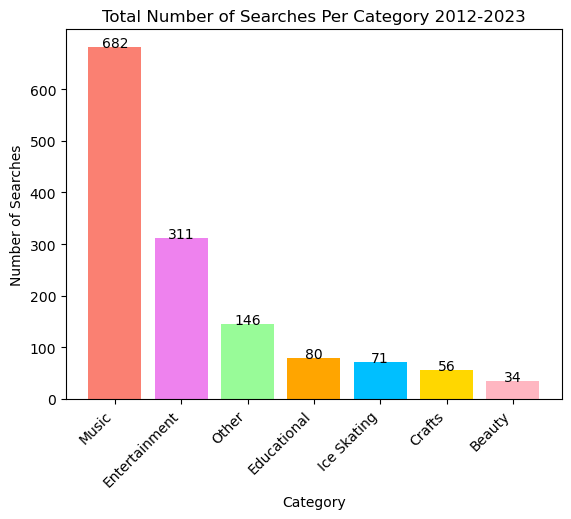

In [140]:
x = df2.index
y = df2.sort_values(ascending=False)
plt.bar(x,y, color = ['salmon', 'violet', 'palegreen', 'orange', 
                              'deepskyblue', 'gold', 'lightpink'])

plt.title("Total Number of Searches Per Category 2012-2023")
plt.ylabel("Number of Searches")
plt.xlabel("Category")
plt.yticks(np.arange(0,700,100))
plt.xticks(rotation=45, ha='right')

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center')
plt.show()

In [141]:
def add_line(categories, freq):
    
    fig,ax=plt.subplots()
    
    for i in categories:
        df = searches[searches["Category"] == i]
        df = df.groupby(pd.Grouper(key='time',freq=freq))["searches"].count()
        df_x = df.index
        df_y = np.array(df)
        print("Average", i, "searches every", freq, ":", round(np.average(df_y),1))
        plt.plot(df_x,df_y, label=i)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xticklabels(np.arange(2013,2025))
    ax.legend(fontsize='x-small')
    plt.xticks(rotation=45)
    plt.title("Count of Searches Per Category Every " + freq + " Between 2012-2023")
    plt.ylabel("Number of Searches")
    plt.xlabel("Year")
    print()
      
categories = ["Music", "Entertainment", "Educational", "Other", "Ice Skating", "Crafts", "Beauty"]

Average Music searches every 1Y : 56.8
Average Entertainment searches every 1Y : 25.9
Average Educational searches every 1Y : 6.7
Average Other searches every 1Y : 12.2
Average Ice Skating searches every 1Y : 7.1
Average Crafts searches every 1Y : 5.1
Average Beauty searches every 1Y : 3.4

Average Music searches every 6M : 29.7
Average Entertainment searches every 6M : 14.1
Average Educational searches every 6M : 3.5
Average Other searches every 6M : 6.6
Average Ice Skating searches every 6M : 3.7
Average Crafts searches every 6M : 2.8
Average Beauty searches every 6M : 1.8

Average Music searches every 3M : 15.2
Average Entertainment searches every 3M : 7.2
Average Educational searches every 3M : 1.8
Average Other searches every 3M : 3.4
Average Ice Skating searches every 3M : 1.9
Average Crafts searches every 3M : 1.4
Average Beauty searches every 3M : 0.9

Average Music searches every 1D : 0.2
Average Entertainment searches every 1D : 0.1
Average Educational searches every 1D : 0.0

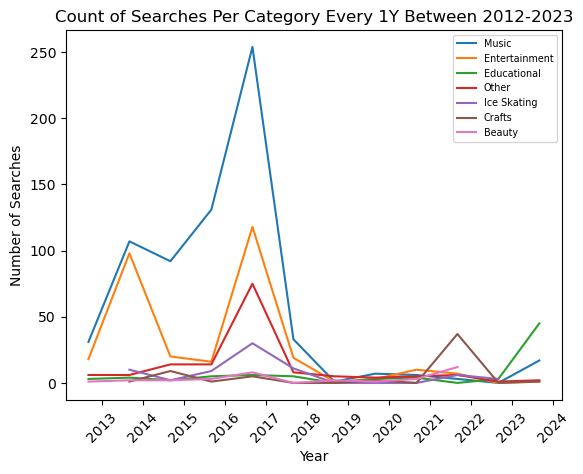

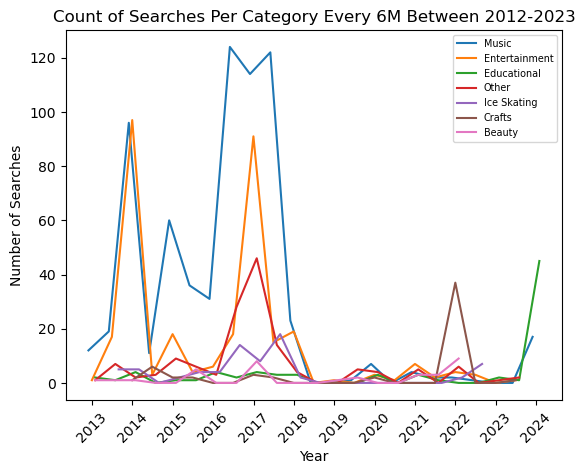

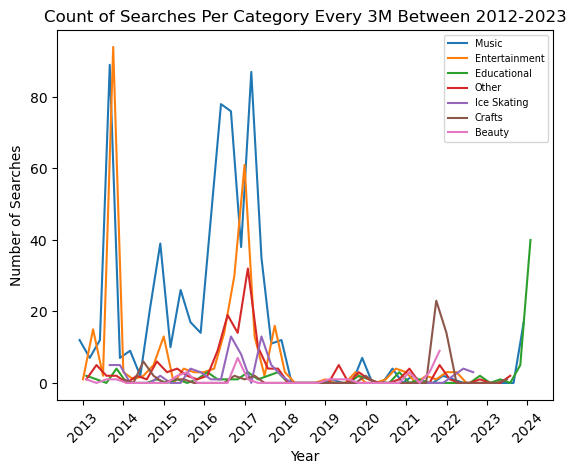

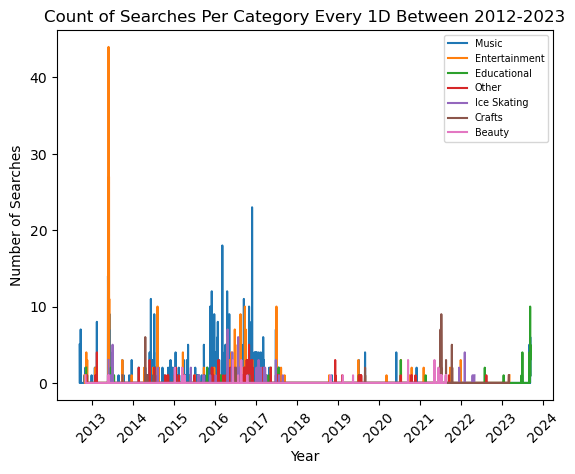

In [142]:
add_line(categories,"1Y")
add_line(categories,"6M")
add_line(categories,"3M")
add_line(categories,"1D")

In [143]:

def add_line(categories, freq):
    
    fig,ax=plt.subplots()
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    c=0
    all_max_yvals = []
    all_max_xvals = []
    all_min_xvals = []
    for i in categories:
        df = searches[searches["Category"] == i]
        df = df.groupby(pd.Grouper(key='time',freq=freq))["searches"].count()
        df_x = df.index
        df_y = np.array(df)
        all_max_yvals.append(df_y.max())
        all_max_xvals.append(df_x.max())
        all_min_xvals.append(df_x.min())
        print("Average", i, "searches every", freq, ":", round(np.average(df_y),1))
        
        df_x_new = np.linspace(mdates.date2num(first), mdates.date2num(last), 1000)
        spl=make_interp_spline(mdates.date2num(df_x), df_y)
        df_y_new = spl(df_x_new)
        plt.plot(df_x, df_y, label=i, color=colors[c])
        plt.plot(df_x_new, df_y_new, color=colors[c])
        plt.xlim(df_x.min(),df_x.max())

        c+=1
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xticklabels(np.arange(2013,2025))
    ax.legend(fontsize='x-small')
    plt.xticks(rotation=45)
    y_top = max(all_max_yvals) + (.25*max(all_max_yvals))
    plt.ylim(0,y_top)
    plt.xlim(min(all_min_xvals), max(all_max_xvals))
    plt.title("Count of Searches Per Category Every " + freq + " Between 2012-2023")
    plt.ylabel("Number of Searches")
    plt.xlabel("Year")
    print()
      
categories = ["Music", "Entertainment", "Educational", "Other", "Ice Skating", "Crafts", "Beauty"]

In [144]:
from scipy.interpolate import splrep, splev

def add_line(categories, freq):
    
    fig,ax=plt.subplots()
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    c=0
    all_max_yvals = []
    all_max_xvals = []
    all_min_xvals = []
    for i in categories:
        df = searches[searches["Category"] == i]
        df = df.groupby(pd.Grouper(key='time',freq=freq))["searches"].count()
        df_x = df.index
        df_y = np.array(df)
        all_max_yvals.append(df_y.max())
        all_max_xvals.append(df_x.max())
        all_min_xvals.append(df_x.min())
        print("Average", i, "searches every", freq, ":", round(np.average(df_y),1))
        
        bspl = splrep(mdates.date2num(df_x), df_y, s=5)
        bspl_y = splev(mdates.date2num(df_x), bspl)
        #plt.plot(df_x, df_y, label=i, color=colors[c])
        plt.plot(mdates.date2num(df_x), bspl_y, label=i, color=colors[c])

        
        #poly = np.polyfit(mdates.date2num(df_x), df_y, 15)
        #poly_y = np.poly1d(poly)(mdates.date2num(df_x))
        #plt.plot(df_x, poly_y, label=i,color=colors[c])
        #plt.plot(df_x, df_y, label=i, color=colors[c])
        
        #df_x_new = np.linspace(mdates.date2num(first), mdates.date2num(last), 1000)
        #spl=make_interp_spline(mdates.date2num(df_x), df_y)
        #df_y_new = spl(df_x_new)
        #plt.plot(df_x, df_y, label=i, color=colors[c])
        #plt.plot(df_x_new, df_y_new, color=colors[c])
        #plt.xlim(df_x.min(),df_x.max())

        c+=1
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xticklabels(np.arange(2013,2025))
    ax.legend(fontsize='x-small')
    plt.xticks(rotation=45)
    y_top = max(all_max_yvals) + (.25*max(all_max_yvals))
    plt.ylim(0,y_top)
    plt.xlim(min(all_min_xvals), max(all_max_xvals))
    plt.title("Count of Searches Per Category Every " + freq + " Between 2012-2023")
    plt.ylabel("Number of Searches")
    plt.xlabel("Year")
    print()
      
categories = ["Music", "Entertainment", "Educational", "Other", "Ice Skating", "Crafts", "Beauty"]

Average Music searches every 1Y : 56.8
Average Entertainment searches every 1Y : 25.9
Average Educational searches every 1Y : 6.7
Average Other searches every 1Y : 12.2
Average Ice Skating searches every 1Y : 7.1
Average Crafts searches every 1Y : 5.1
Average Beauty searches every 1Y : 3.4

Average Music searches every 3M : 15.2
Average Entertainment searches every 3M : 7.2
Average Educational searches every 3M : 1.8
Average Other searches every 3M : 3.4
Average Ice Skating searches every 3M : 1.9
Average Crafts searches every 3M : 1.4
Average Beauty searches every 3M : 0.9



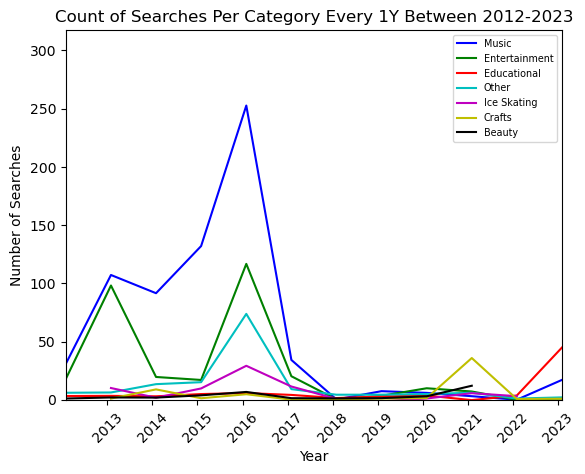

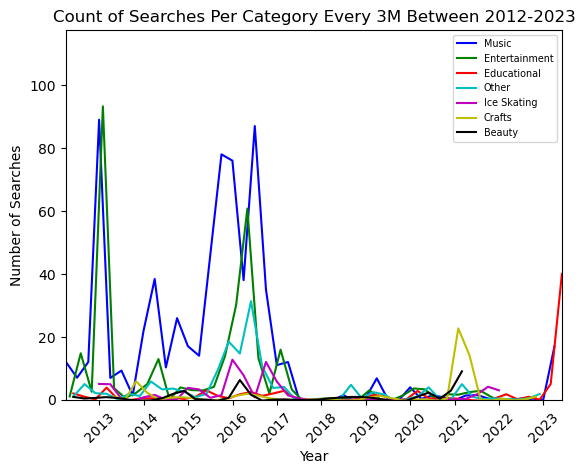

In [145]:
add_line(categories,"1Y")
add_line(categories,"3M")

In [146]:
# ^multicategory bar chart

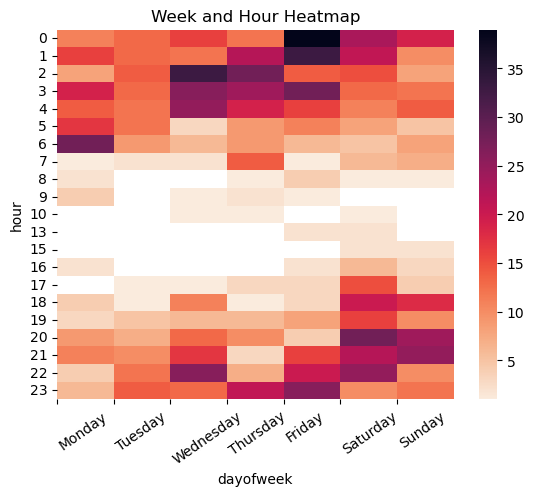

In [147]:
searches["hour"] = searches["time"].dt.hour
searches["dayofweek"] = searches['time'].dt.weekday
a = searches.groupby(["hour", "dayofweek"])["searches"].size().reset_index()
a2 = a.pivot("hour", "dayofweek", "searches")

plt.title("Week and Hour Heatmap")
ax = sns.heatmap(a2[np.arange(0,7)], cmap="rocket_r")
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=35, ha='left')
plt.show()

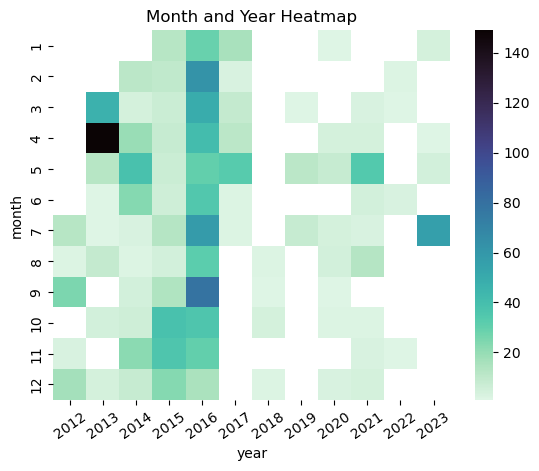

In [148]:
searches["month"] = searches["time"].dt.month
searches["year"] = searches['time'].dt.year
a = searches.groupby(["month", "year"])["searches"].size().reset_index()
a2 = a.pivot("month", "year", "searches")

plt.title("Month and Year Heatmap")
sns.heatmap(a2[np.arange(2012,2024)], cmap="mako_r")
plt.xticks(rotation=35, ha='center')
plt.show()

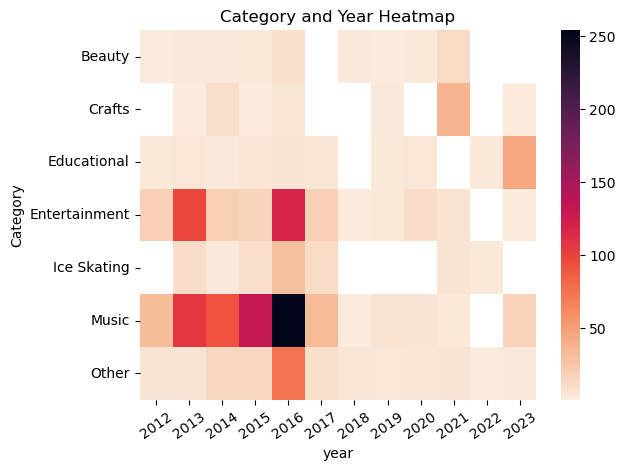

In [149]:
#searches["month"] = searches["time"].dt.month
searches["year"] = searches['time'].dt.year
a = searches.groupby(["Category", "year"])["searches"].size().reset_index()
a2 = a.pivot("Category", "year", "searches")

plt.title("Category and Year Heatmap")
sns.heatmap(a2[np.arange(2012,2024)], cmap="rocket_r")
plt.xticks(rotation=35, ha='center')
#plt.yticks(rotation=25, ha='right')
plt.show()

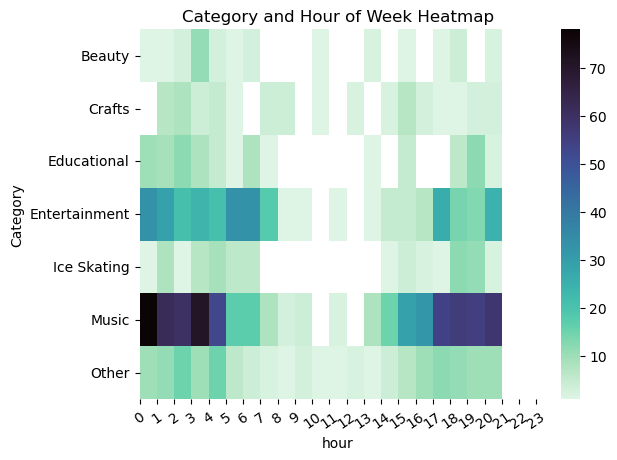

In [150]:
#searches["hour"] = searches["time"].dt.hour
searches["hour"] = searches['time'].dt.hour
a = searches.groupby(["Category", "hour"])["searches"].size().reset_index()
a2 = a.pivot("Category", "hour", "searches")

plt.title("Category and Hour of Week Heatmap")
ax = sns.heatmap(a2[np.delete(np.arange(0,24),[11,12,14])], cmap="mako_r")
ax.set_xticks(np.arange(0,24))
ax.set_xticklabels(np.arange(0,24))
plt.xticks(rotation=35, ha='center')
plt.show()

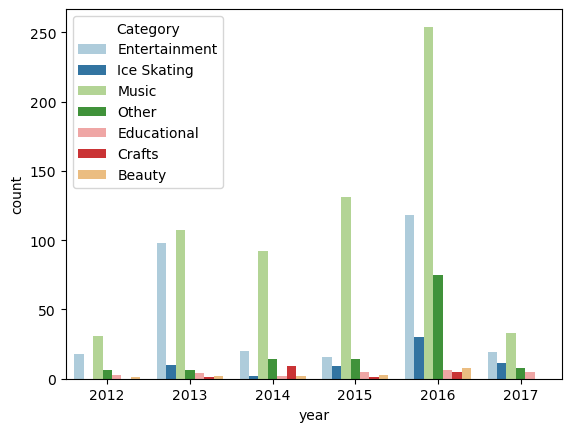

In [151]:

sns.countplot(x="year", hue="Category", palette="Paired", 
              data=searches[searches['year'] < 2018 ])
#sns.palplot(sns.color_palette())
plt.show()

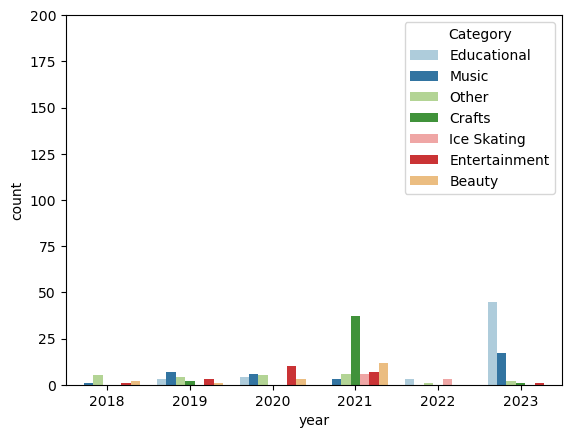

In [152]:
ax = sns.countplot(x="year", hue="Category", palette="Paired", 
              data=searches[searches['year'] >= 2018 ])
#ax.set_yticks(np.arange(0,200))
#ax.set_yticklabels(np.arange(0,200,50))
plt.ylim(0,200)
plt.show()

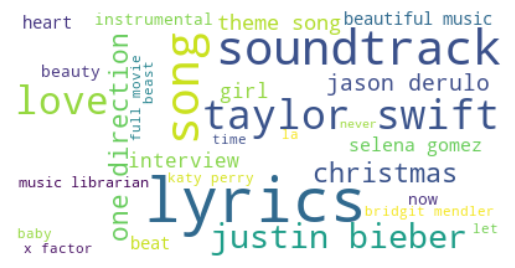

In [153]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Music"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

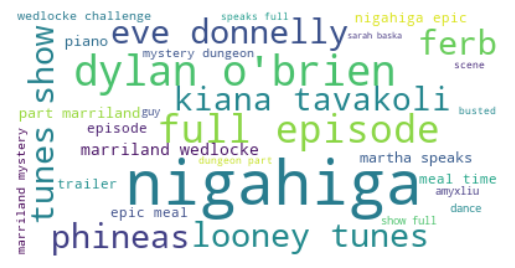

In [154]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Entertainment"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

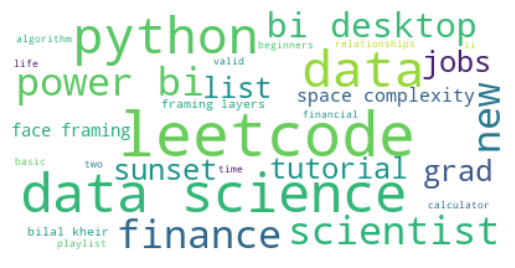

In [155]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Educational"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

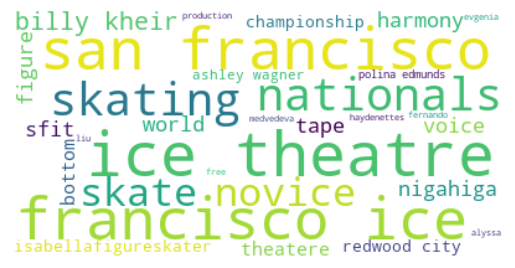

In [156]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Ice Skating"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

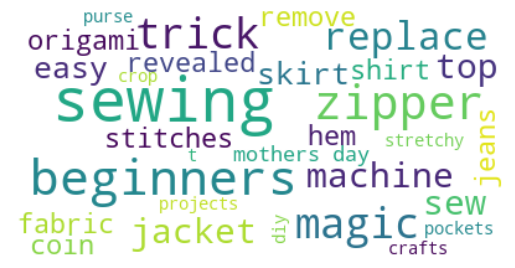

In [157]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Crafts"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")

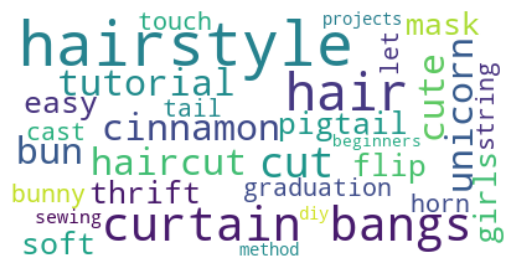

In [158]:
_ = searches[(searches['searches']=='Yes')].copy()
_ = _[_["Category"]=="Beauty"]
_['query'] = _['title'].apply(lambda x: x[13:])
queries = list(_['query'])


# Join each query into a single string, then run it through WordCloud.

text = " ".join(query for query in queries)
wordcloud = WordCloud(max_font_size=50, max_words=30,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("my_search_history.png")